In [1]:
if 0:
    !curl -L https://raw.githubusercontent.com/markusloecher/hwr/master/data/Auto.csv -o Auto.csv
    !curl -L https://raw.githubusercontent.com/markusloecher/hwr/master/data/BirthWeights.csv -o BirthWeights.csv
    !curl -L https://github.com/hadley/nycflights13/blob/master/data/flights.rda?raw=true -o flights.rda

In [2]:
import numpy as np
#import matplotlib as plt
import pandas
df = pandas.read_csv('../data/Auto.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
Manufacturer    392 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 30.7+ KB


### Tasks

1. Compute the mean mpg of all cars.
2. Plot a histogram of mpg
3. Compute the mean mpg grouped by cylinder.
4. Create a boxplot of mpg vs. cylinder
5. Find the median and lower/upper quartiles
6. Scatterplot mpg vs. weight

In [3]:
df["mpg"].values[0:9]


array([18., 15., 18., 16., 17., 15., 14., 14., 14.])

In [4]:
#Plot a histogram of mpg

import matplotlib.pyplot as plt
import matplotlib

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df["mpg"].values, bins='auto', color='#0504aa',
                            alpha=0.5, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.title('Distribution of mpg')

maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 60.0)

In [5]:
help(pandas.DataFrame.boxplot)

Help on function boxplot_frame in module pandas.plotting._core:

boxplot_frame(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds)
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. The position of the whiskers
    is set by default to `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box.
    Outlier points are those past the end of the whiskers.
    
    For further details see
    Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.
    
    Parameters
    ----------
    column : str or list of str, optional
       

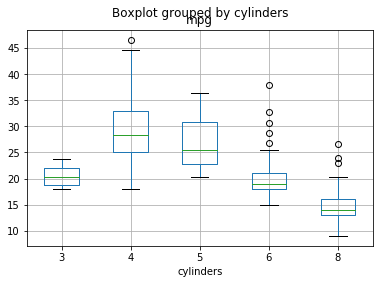

In [6]:
#Create a boxplot of mpg vs. cylinder
bp = df.boxplot(by='cylinders', column="mpg")

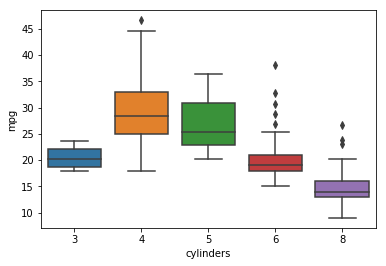

In [7]:
#or
import seaborn as sns
bp=sns.boxplot('cylinders', 'mpg', data=df)

In [10]:
#Find the median and lower/upper quartiles
df["mpg"].quantile([0.25,0.5,0.75])
df["mpg"].describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'inspect'

cylinders
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: mpg, dtype: float64


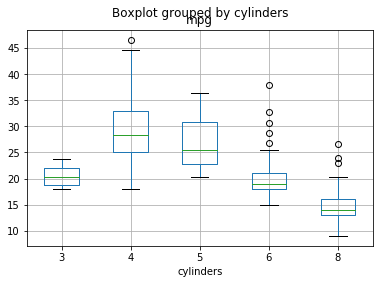

In [12]:
#much more interesting to apply to each cylinder group separately:
grouped = df["mpg"].groupby(df["cylinders"])
#grouped = df.groupby("cylinders")

#df["mpg"].groupby(df["cylinders"]).mean()

print(grouped.mean())
grouped.count()
grouped.quantile([0.25,0.5,0.75])
df.boxplot("mpg","cylinders")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


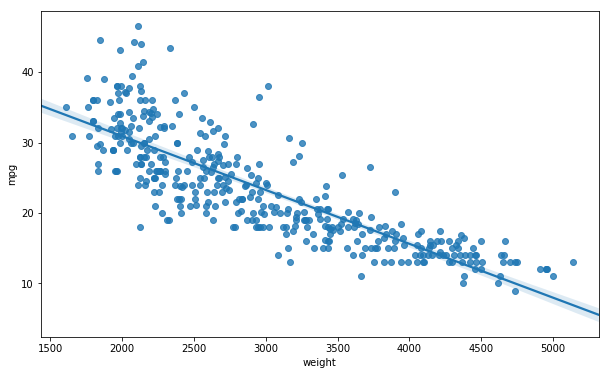

In [13]:
#Scatterplot mpg vs. weight
plt.rc('figure', figsize=(10, 6))
plt.figure()
sns.regplot('weight', 'mpg', data=df)

### Tasks

1. Create two random (normally distibuted) vectors x1 and x2 of length 500
2. Compute their individual stdevs
3. Create 2 new variables: (i) xs: the sum of x1 and x2 and (ii) xm: the mean of x1 and x2
4. Compute the stdevs of xs and xm

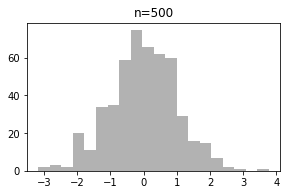

In [14]:
from numpy.random import randn
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
n=500
x1=randn(n)
_ = ax1.hist(x1, bins=20, color='k', alpha=0.3)
plt.title("n=" + str(n))
x2=randn(500)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


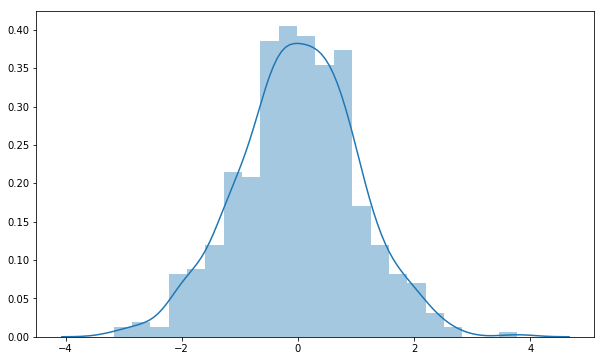

In [15]:
sns.distplot(x1, hist=True, kde=True)

In [16]:
import pandas as pd
data={"x1": x1,"x2": x2}
x1df = pd.DataFrame(data)
#x1df["x1"].plot.density()
#Compute their individual stdevs
x1df.std()
np.mean(x1)
#d=(x1-np.mean(x1))**2

0.003114886373456585

In [ ]:
#manual:
#np.mean((x1-np.mean(x1))**2)

In [17]:
# birth weight data
df = pandas.read_csv('../data/BirthWeights.csv')
df.head()

,Unnamed: 0,gender,dbirwt
0,1,male,2551
1,2,male,2778
2,3,female,2976
3,4,female,3345
4,5,female,3175


### Tasks

1. Create a boxplot of weight vs. sex
2. Plot overlaying densities for male/female 
3. Take repeated (M=500) random sample of size n=10,40,160,640
    Repeat the above density plot for the sample mean distribution
    Compute the stdevs for the sample means of each gender separately
4. Make the above a function

In [18]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
PclassSurv = titanic.groupby(['pclass', 'survived'])
PclassSurv.size()


pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [20]:
titanic.describe()
#titanic.survived

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
pd.crosstab(titanic.pclass, titanic.survived,margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Equivalent of pnorm and qnorm

qnorm(p, mean = 0, sd = 1) is equivalent to scipy.stats.norm.ppf(q, loc=0, scale=1)

http://people.duke.edu/~ccc14/sta-663/UsingNumpySolutions.html

In [22]:
import scipy.stats as st
st.norm.ppf([0.01, 0.99])

array([-2.32634787,  2.32634787])

In [23]:
# Create a "frozen" distribution - i.e. a partially applied function
dist = st.norm(0, 1)
# same as pnorm
dist.pdf(np.linspace(5, 15, 10))

array([1.48671951e-06, 3.10026564e-09, 1.88106042e-12, 3.32078344e-16,
       1.70573806e-20, 2.54928327e-25, 1.10855648e-30, 1.40259255e-36,
       5.16344081e-43, 5.53070955e-50])